# Problemas de optimización escalar
Resuelva los siguientes problemas usando la librería `SymPy`. Use celdas en `Markdown` para explicar su procedimiento, así como los resultados obtenidos.

1. El perímetro de un triángulo isósceles es de $10 cm$. ¿Cuánto deben medir sus lados para que el volumen del cuerpo generado por la rotación del triángulo en torno a su base sea el mayor posible? (Volumen de un cono $= \frac{1}{3}\pi r^2 h$, donde $r$ es el radio de la base y $h$ la altura del cono).

In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
b = sym.var('b')
h = sym.sqrt(((10-b)/2)**2 - (b/2)**2)
V = (1/3)*sym.pi*(b/2)**2*h
V

0.0833333333333333*pi*b**2*sqrt(-b**2/4 + (5 - b/2)**2)

In [4]:
dV = V.diff()
dV

-0.208333333333333*pi*b**2/sqrt(-b**2/4 + (5 - b/2)**2) + 0.166666666666667*pi*b*sqrt(-b**2/4 + (5 - b/2)**2)

In [5]:
c = sym.solve(dV, b)
c

[0.0, 4.00000000000000]

In [6]:
dV2 = dV.diff()
dV2

-0.520833333333333*pi*b**2/(-b**2/4 + (5 - b/2)**2)**(3/2) - 0.833333333333333*pi*b/sqrt(-b**2/4 + (5 - b/2)**2) + 0.166666666666667*pi*sqrt(-b**2/4 + (5 - b/2)**2)

/tmp/ipython-input-2583944047.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


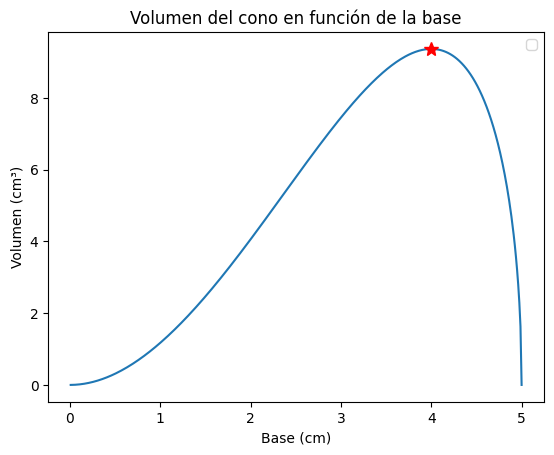

In [7]:
f = sym.lambdify(b, V, "numpy")       # <- esta línea arregla el error
bx = np.linspace(0.01, 5, 400)        # dominio válido: 0 < b ≤ 5
plt.plot(bx, f(bx))
b_max = 4
V_max = f(b_max)
plt.plot(b_max, V_max, 'r*', ms=10)   # punto rojo
plt.legend()
plt.title("Volumen del cono en función de la base")
plt.xlabel("Base (cm)")
plt.ylabel("Volumen (cm³)")
plt.grid(True)
plt.grid()

El perímetro del triángulo isósceles es de **10 cm**.  
Queremos maximizar el volumen del cono formado al girar el triángulo alrededor de su base.  

- Sea `b` la base del triángulo.  
- Los lados iguales miden:  
$
\frac{10-b}{2}
$

- La altura del triángulo se obtiene con Pitágoras:  
$
h = \sqrt{\left(\frac{10-b}{2}\right)^2 - \left(\frac{b}{2}\right)^2}
$

- Al girar el triángulo alrededor de su base, se forma un cono de radio:  
$
r = \frac{b}{2}
$

- Volumen del cono:  
$
V = \frac{1}{3}\pi r^2 h = \frac{1}{12}\pi b^2 \sqrt{\left(\frac{10-b}{2}\right)^2 - \left(\frac{b}{2}\right)^2}
$


### Cálculo de puntos críticos

- Derivando e igualando a cero:  
$
V'(b) = 0 \quad \Rightarrow \quad b = 0 \quad \text{o} \quad b = 4
$

- El caso \(b=0\) no es válido geométricamente.  
- Entonces, el valor óptimo es:  
$
b = 4 \, \text{cm}
$


### Resultados

- **Base**: $ b = 4 \, \text{cm} $
- **Lados iguales**:  
$
\frac{10-b}{2} = 3 \, \text{cm}
$
- **Altura del triángulo (y del cono)**:  
$
h = \sqrt{3^2 - 2^2} = \sqrt{5} \approx 2.236 \, \text{cm}
$
- **Radio del cono**: $ r = 2 \, \text{cm} $  
- **Volumen máximo**:  
$
V = \frac{1}{3}\pi r^2 h = \frac{1}{3}\pi (2^2)(\sqrt{5}) \approx 9.36 \, \text{cm}^3
$


### Conclusión

El volumen máximo del sólido de revolución se obtiene cuando:  
- **Base = 4 cm**  
- **Lados = 3 cm**  

y el volumen es aproximadamente **9.36 cm³**.

2. Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol. Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?

In [8]:
h = sym.var('h')
A = h*(6 - 2*h)
A

h*(6 - 2*h)

In [9]:
dA = A.diff()
dA

6 - 4*h

In [10]:
c = sym.solve(dA, h)
c

[3/2]

In [11]:
dA2 = dA.diff()
dA2

-4

/tmp/ipython-input-2907146143.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


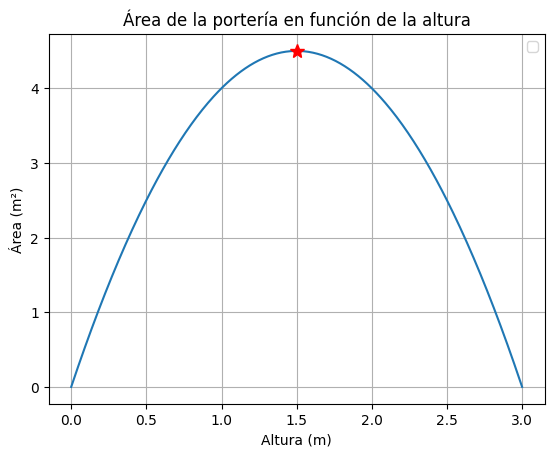

In [12]:
f = sym.lambdify(h, A, "numpy")
hx = np.linspace(0, 3, 400)
plt.plot(hx, f(hx))


h_max = float(c[0])      # h crítico
A_max = f(h_max)
plt.plot(h_max, A_max, 'r*', ms=10)  # punto rojo
plt.legend()

plt.title("Área de la portería en función de la altura")
plt.xlabel("Altura (m)")
plt.ylabel("Área (m²)")
plt.grid(True)
plt.show()



Disponemos de una barra de aluminio de **6 m** para construir una portería de fútbol rectangular.  
Queremos maximizar el área de la portería.  


### Desarrollo

- Sea `h` la altura de los postes.  
- El ancho será:
$
w = 6 - 2h
$
(porque la barra total se reparte en 2 postes y 1 travesaño).  

- Área de la portería:
$
A = h \cdot w = h(6 - 2h)
$


### Cálculo de puntos críticos

- Derivada de la función área:
$
A'(h) = 6 - 4h
$

- Igualamos a cero:
$
6 - 4h = 0 \quad \Rightarrow \quad h = 1.5
$

- Con este valor:
$
w = 6 - 2(1.5) = 3
$


### Resultados

- **Altura de los postes**: $ h = 1.5 \, \text{m} $
- **Ancho del travesaño**: $ w = 3 \, \text{m} $  
- **Área máxima**:  
$
A = 1.5 \cdot 3 = 4.5 \, \text{m}^2
$


### Conclusión

Para que el área de la portería sea máxima, los **postes deben medir 1.5 m**  
y el **travesaño debe medir 3 m**, obteniendo un área máxima de **4.5 m²**.